## Run after python split_script_14515X1.MT.py

In [1]:
import glob
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import pysam
import time
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
%matplotlib inline

from os.path import join

In [2]:

BARCODE_INFO = "../data/processed/A/A_barcode_data.p"
maxBP = 16571


## Load CB's, get ones that have over average read coverage of 1x

In [3]:
[CR_read_number,CB_read_number,BC_read_number, barcodes, corrected_barcodes, barcode_pairs] = pickle.load(open(BARCODE_INFO,"rb"))

In [5]:
len(CB_read_number)

106815

In [6]:
cb_read_200 = 0
cb_cov_1x = 0
for i in CB_read_number:
    if CB_read_number[i] >= 200:
        cb_read_200 += 1
    if CB_read_number[i]*100 >= maxBP:
        cb_cov_1x += 1

print(cb_read_200)
print(cb_cov_1x)
    

4111
4713


17


Text(0.5, 1.0, 'LOG Number of reads per MT length per cell\nN cells with > 1x read coverage =17')

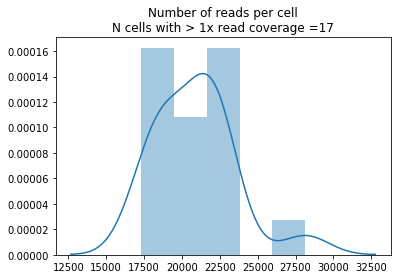

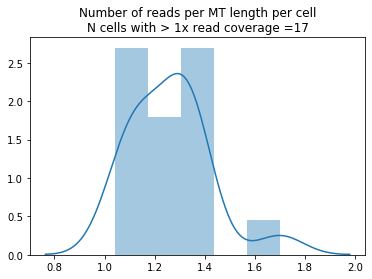

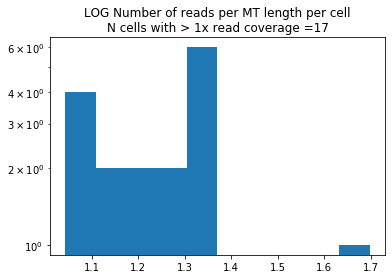

In [4]:
CB_read_MT = dict()
for i in CB_read_number:
    if CB_read_number[i] >= maxBP:
        CB_read_MT[i] = CB_read_number[i]
    
print(len(CB_read_MT))
plt.figure()
sns.distplot(list(CB_read_MT.values()))
plt.title(f"Number of reads per cell\nN cells with number of reads >1x number of MT bps ={len(CB_read_MT)}")

plt.figure()
sns.distplot(np.array(list(CB_read_MT.values()))/maxBP)
plt.title( f"Number of reads per cell\nN cells with number of reads >1x number of MT bps ={len(CB_read_MT)}")

plt.figure()
plt.hist(np.array(list(CB_read_MT.values()))/maxBP,log=True)
plt.title(f"LOG Number of reads per cell\nN cells with number of reads >1x number of MT bps ={len(CB_read_MT)}")

## Assume read length is 100bp

4713


Text(0.5, 1.0, 'LOG Number of nts per MT length per cell\nN cells with > 1x read coverage =4713')

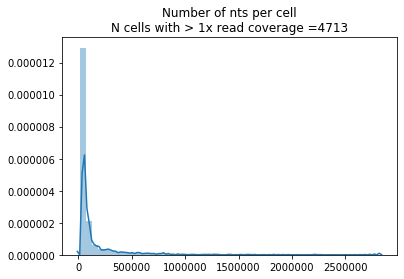

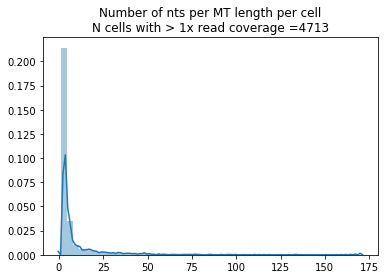

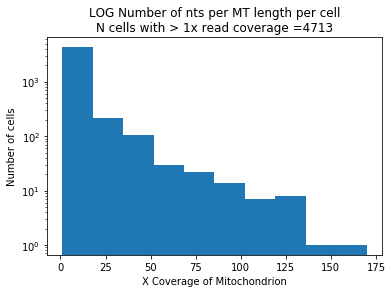

In [16]:
CB_read_MT = dict()
for i in CB_read_number:
    if CB_read_number[i]*100 >= maxBP:
        CB_read_MT[i] = CB_read_number[i]*100
    
print(len(CB_read_MT))
plt.figure()
sns.distplot(list(CB_read_MT.values()))
plt.title(f"Number of nts per cell\nN cells with > 1x read coverage ={len(CB_read_MT)}")

plt.figure()
sns.distplot(np.array(list(CB_read_MT.values()))/maxBP)
plt.title(f"Number of nts per MT length per cell\nN cells with > 1x read coverage ={len(CB_read_MT)}")

# plt.figure()
# plt.hist(np.array(list(CB_read_MT.values()))/maxBP,log=True)
# plt.title(f"LOG Number of nts per MT length per cell\nN cells with > 1x read coverage ={len(CB_read_MT)}")
# plt.savefig("../figures/CB_coverage_hist.png")

plt.figure()
plt.hist(np.array(list(CB_read_MT.values())) / maxBP, log=True)
plt.xlabel("X Coverage of Mitochondrion")
plt.ylabel("Number of cells")
plt.title(
    f"LOG Number of nts per MT length per cell\nN cells with > 1x read coverage ={len(CB_read_MT)}")


In [15]:
cov = np.array(list(CB_read_MT.values()))/maxBP
(cov > 150).sum()

1

## Get the hamming distance of all barcodes

In [9]:
len(CB_read_MT)

4713

In [8]:
def hamming_distance(pattern1, pattern2):
    '''
    This function calculates the number of mismatches between two patterns ("pattern1" and "pattern2")
    of equal lenght.
    '''
    assert len(pattern1) == len(pattern2)
    return sum(p1 != p2 for p1, p2 in zip(pattern1, pattern2))

In [9]:
del CB_read_number

In [11]:
ind1

0

### Didnt finish all of them b/c of time

In [12]:
CBs = list(CB_read_MT.keys())
hamming_df = pd.DataFrame(index=CBs, columns=CBs,dtype=int)
for ind1,val1 in tqdm(enumerate(CBs)):
    for _,val2 in enumerate(CBs[ind1+1:]):
        hamming_df.loc[val1, val2] = hamming_distance(val1, val2)

3003it [29:28:22, 34.17s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

8945it [84:18:03, 31.23s/it]

KeyboardInterrupt: 

In [13]:
hamming_df

,AAACCTGAGATGCGAC,AAACGGGAGGGTGTGT,AAACGGGCATGGTCTA,AAACGGGTCTAGCACA,AAAGATGCACGTTGGC,AAAGATGCAGTCGATT,AAAGATGCATTGGGCC,AAAGATGGTGCACCAC,AAAGATGTCTCGAGTA,AAAGCAAAGTGTGGCA,...,TAGTGGTGTGGCGAAT,GACGGCTAGGAGCGTT,ACTGAACAGGAGTTGC,CCTTACGCAAAGGTGC,CCGGTAGGTTAGATGA,TGACGGCCAGATCTGT,TACTCATCAGCCAATT,TTAACTCGTTGGGACA,CACACTCAGTCTCAAC,ACACCCTAGGCTCATT
AAACCTGAGATGCGAC,NaN,9.0,10.0,9.0,9.0,10.0,7.0,8.0,9.0,9.0,...,14.0,10.0,11.0,12.0,14.0,13.0,14.0,12.0,8.0,9.0
AAACGGGAGGGTGTGT,NaN,NaN,8.0,9.0,9.0,9.0,11.0,11.0,12.0,8.0,...,9.0,10.0,10.0,12.0,13.0,7.0,13.0,13.0,12.0,8.0
AAACGGGCATGGTCTA,NaN,NaN,NaN,6.0,8.0,9.0,8.0,11.0,8.0,10.0,...,12.0,12.0,13.0,12.0,12.0,10.0,12.0,11.0,14.0,12.0
AAACGGGTCTAGCACA,NaN,NaN,NaN,NaN,12.0,11.0,9.0,11.0,7.0,10.0,...,12.0,11.0,13.0,13.0,11.0,10.0,14.0,10.0,12.0,11.0
AAAGATGCACGTTGGC,NaN,NaN,NaN,NaN,NaN,7.0,5.0,8.0,8.0,9.0,...,14.0,13.0,10.0,10.0,13.0,11.0,13.0,13.0,12.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGACGGCCAGATCTGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TACTCATCAGCCAATT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTAACTCGTTGGGACA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CACACTCAGTCTCAAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
hamming_df.isnull().all(axis=1).sum()

67307

In [19]:
(hamming_df.fillna(np.infty) <= 1).any()

AAACCTGAGATGCGAC    False
AAACGGGAGGGTGTGT    False
AAACGGGCATGGTCTA    False
AAACGGGTCTAGCACA    False
AAAGATGCACGTTGGC    False
                    ...  
TGACGGCCAGATCTGT    False
TACTCATCAGCCAATT    False
TTAACTCGTTGGGACA    False
CACACTCAGTCTCAAC    False
ACACCCTAGGCTCATT    False
Length: 76253, dtype: bool

In [21]:
(hamming_df.fillna(np.infty) <= 1).sum().sum()

0

In [31]:
hamming_full = hamming_df.values.flatten()
hamming_full = hamming_full[~np.isnan(hamming_full)]

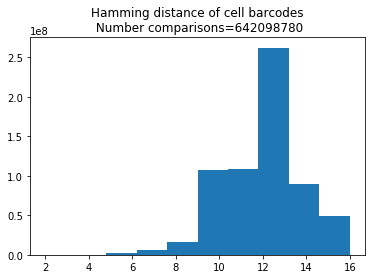

In [32]:
plt.hist(hamming_full)
plt.title(f"Hamming distance of cell barcodes\n Number comparisons={len(hamming_full)}")
plt.savefig("../figures/CB_barcode_hamming")